This file is used for fitting the curve of the avaerage value of bottom 5% of NO2 concentration data for each temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the raw value of NO2 concentration and corresponding temperature for each node at each timestamp.
no2_temp = pd.read_csv('data/TEMP_NO2.csv',header = 0, index_col=0)

In [3]:
no2_temp = no2_temp.rename({'value_raw_x':'no2_raw', 'value_hrf_y':'temp'}, axis =1) 

In [4]:
no2_temp.head()

timestamp       node_id  no2_raw   temp
4   2018/10/01 00:00:01  001e06114fd4    -59.0  17.20
8   2018/10/01 00:00:02  001e0610ba46   1050.0  19.70
13  2018/10/01 00:00:02  001e0610f703   2489.0  17.20
17  2018/10/01 00:00:02  001e061144c0    321.0  19.20
21  2018/10/01 00:00:04  001e0610ee33   1856.0  17.35

In [5]:
no2_temp.timestamp = pd.to_datetime(no2_temp.timestamp)

In [6]:
# The time span is from 2018-10-01 to 2019-07-31.
no2_temp.timestamp.describe()

count                28507274
unique               12973820
top       2019-01-11 11:30:32
freq                      634
first     2018-10-01 00:00:01
last      2019-07-31 23:59:58
Name: timestamp, dtype: object

In [7]:
# We have 65 nodes that contain information of NO2 concentration from 2018-10-01 to 2019-07-31.
no2_temp['node_id'].nunique()

65

In [8]:
no2_temp.groupby('node_id').describe()

no2_raw                                                    \
                  count          mean            std        min       25%   
node_id                                                                     
001e06109401    34750.0    215.215885   19757.986825  -216106.0   -585.00   
001e06109416   192217.0    186.164928    1163.820036   -21370.0   -106.00   
001e0610b9e9    58966.0   -143.366805    7421.395080   -78563.0    322.00   
001e0610ba13   975426.0   2108.527121    1552.538372    -1000.0   1326.00   
001e0610ba15  1393325.0  -3712.075653   18715.781230  -367816.0    -14.00   
001e0610ba16   215713.0  -3431.038301    1689.912502    -9757.0  -4377.00   
001e0610ba46  1229548.0    821.536129     824.249975    -6678.0    519.00   
001e0610bbf9    25651.0  -6872.785388   27304.682039  -285104.0  -1724.00   
001e0610bc10   891502.0  -1933.304676   20489.435146  -367817.0    251.00   
001e0610bc12   104408.0   -652.722675    6483.500287   -35803.0   -299.00   
001e0610e532    26321.0  50391.240834  163151.857125 -7633376.0  -7583.00   
001e0610e537  1727600.0   1002.415910    1055.355072   -23337.0    559.00   
001e0610e539   166513.0    646.553500    5927.821895  -367816.0    403.00   
001e0610e835   699311.0   1783.565617    6276.497225  -367817.0    567.00   
001e0610e8cb    54841.0 -10703.982768   45880.046653  -367817.0     38.00   
001e0610ee33  1564242.0   1050.983446     754.523675   -36592.0    633.00   
001e0610ee43  1726472.0   1056.222092     658.012452    -4663.0    621.00   
001e0610ee5d    48543.0   1378.982098    4686.737564   -32821.0   1178.50   
001e0610ee82   237573.0    854.994650    2399.059933   -25220.0    752.00   
001e0610eef2   915543.0  -4034.910862   19624.245334  -367817.0   -420.00   
001e0610ef27  1005570.0  -3748.907326   27198.408278  -367817.0  -1457.00   
001e0610f02f    63662.0 -19959.236468   73293.459872  -367817.0 -16460.00   
001e0610f05c  1392895.0  11099.437958   58643.451232  -332308.0    792.00   
001e0610f6db  1276460.0    447.046360     486.180320    -2321.0    124.00   
001e0610f703   432066.0  -3929.870649   37229.093503  -367817.0    465.00   
001e0610f732    89852.0 -17700.183235   36133.837463  -367018.0 -21953.50   
001e06112e77   295076.0  -6201.371609   26024.667999  -266603.0   -209.00   
001e061130f4  1472364.0  -1581.047926   10014.228013  -367537.0   -503.00   
001e06113107  1213716.0   1153.820522     763.654578    -3534.0    776.00   
001e061135cb   201510.0    299.135621   13114.539508  -367817.0    365.00   
...                 ...           ...            ...        ...       ...   
001e06113d78    30459.0   1220.802620    1349.893624    -5135.0    813.00   
001e06113dbc   526949.0 -10424.887872   36758.487848  -367817.0  -7100.00   
001e06113f54    28682.0    613.966181     506.038896    -1366.0    268.00   
001e0611441e     1028.0   1398.137160   10612.257265    -1857.0    365.25   
001e061144be    34846.0   1372.763531    2836.256245    -2023.0    889.00   
001e061144c0  1036807.0 -24064.561275   59725.558622  -367817.0  -7680.00   
001e061144d6    52017.0  -5608.361959   21078.973133  -367817.0  -4344.00   
001e06114500  1007108.0  -3197.614388   21716.763387  -367817.0   -327.00   
001e06114503   435446.0  -4602.009395   29925.520245  -367817.0    -52.00   
001e0611462f   132441.0 -21040.172031   76786.214704  -367817.0   -661.00   
001e061146bc   456143.0   -235.370094    6484.133804  -367813.0    167.00   
001e061146cb   232145.0  -4792.018687   13268.461195   -95826.0  -3911.00   
001e06114fcf   215228.0   -435.301880    7375.963199  -143400.0    225.00   
001e06114fd4   813217.0     90.216292    8530.179885  -367817.0    232.00   
001e06115365   164613.0   2376.637538     897.986499     -558.0   1782.00   
001e06115369    31010.0  -6573.335859   35312.904631  -367817.0    384.00   
001e0611537d   124548.0   2026.445194     907.385742     -961.0   1441.00   
001e06117b41   120853.0    419.779840    2109.128209    -3656.0    -44.00   
001e06117b44

In [9]:
#Get dataframes for each node and save it into a dictionary.
# nodes={}
# for node_id in no2_temp['node_id'].unique():
#     nodes[node_id] = no2_temp[no2_temp['node_id'] == node_id]
#     no2_temp[no2_temp['node_id'] == node_id].to_csv('nodedata/'+str(node_id)+'.csv')

In [10]:
nodes = list(no2_temp['node_id'].unique())

In [11]:
def func(x, a, b, c):
    return a*np.exp(b*x)+c

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


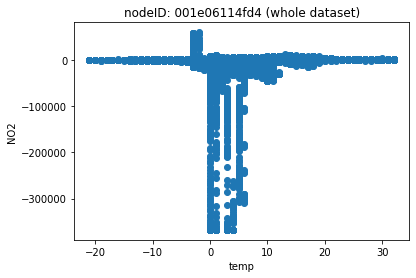

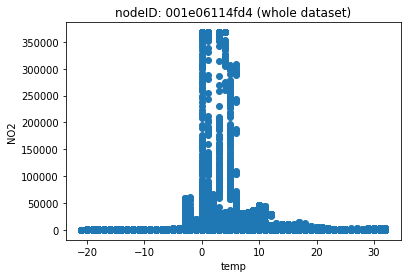

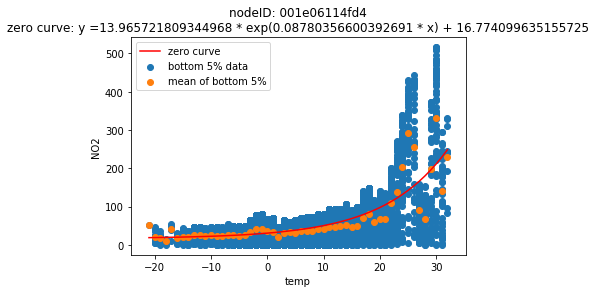

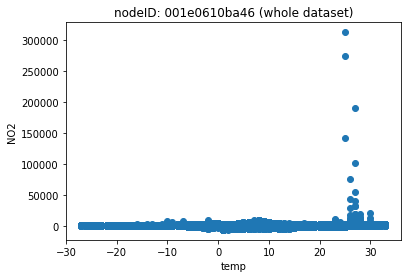

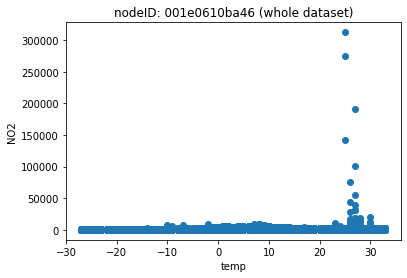

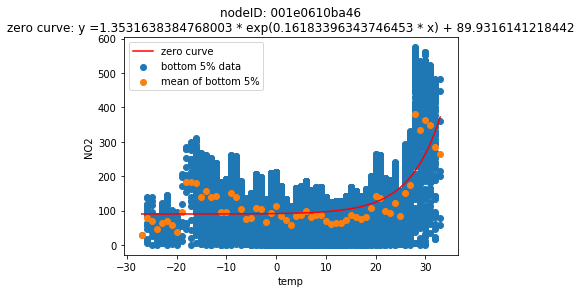

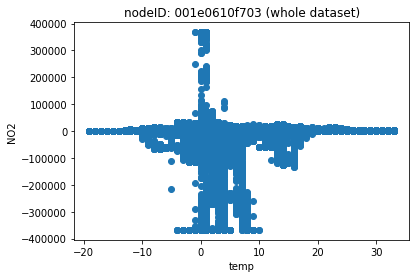

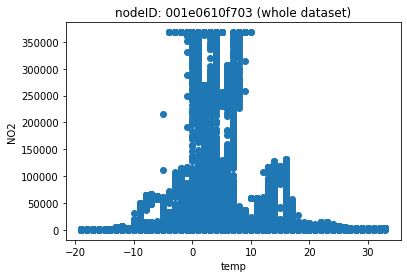

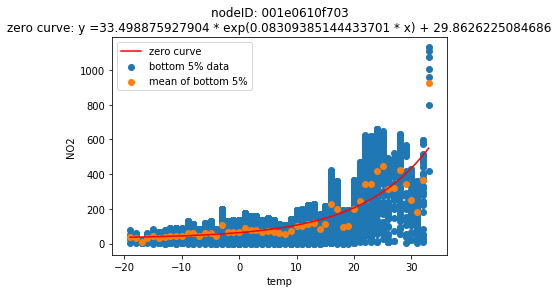

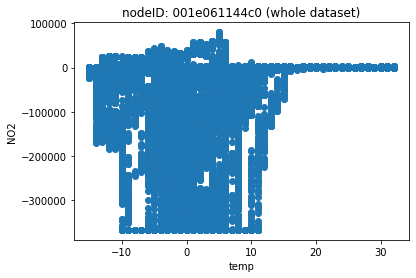

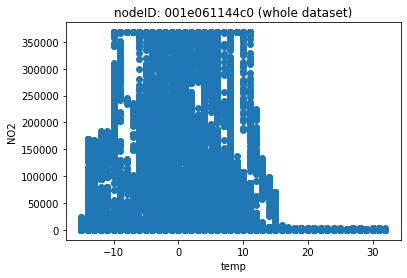

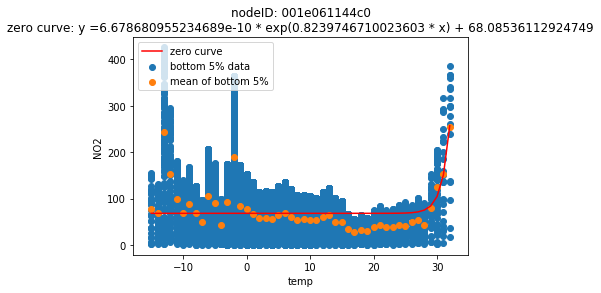

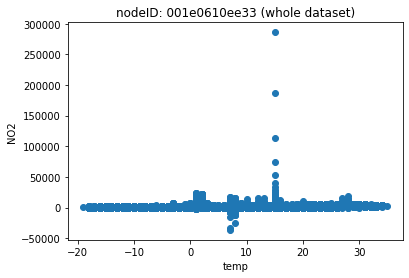

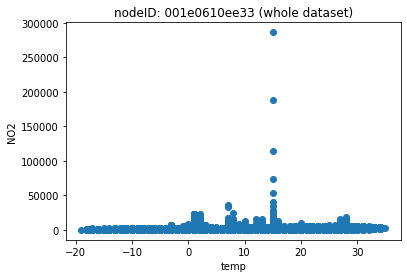

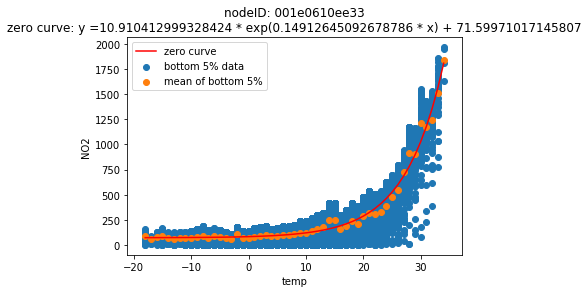

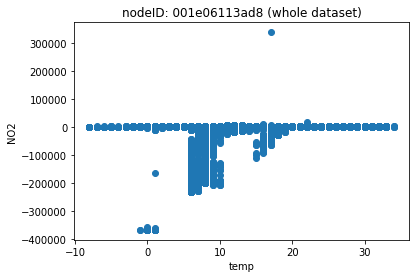

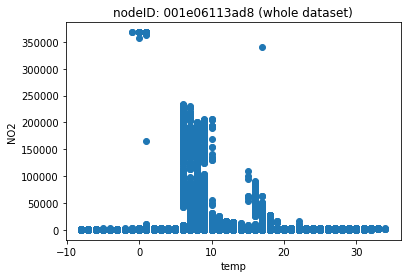

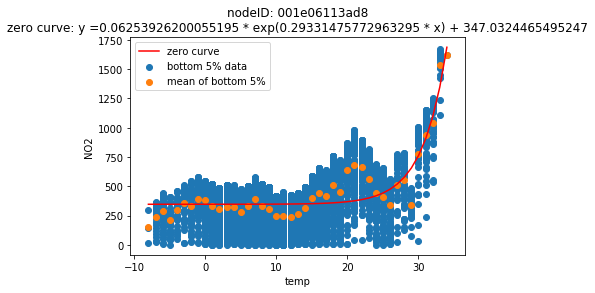

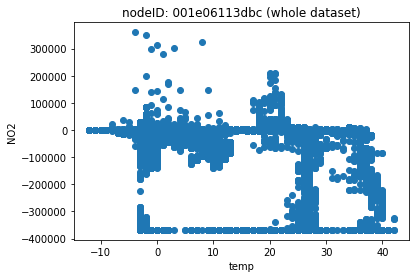

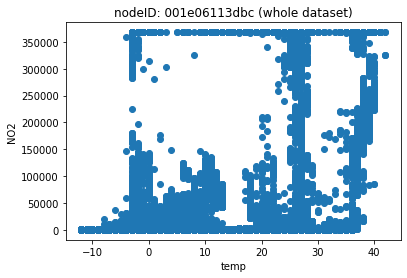

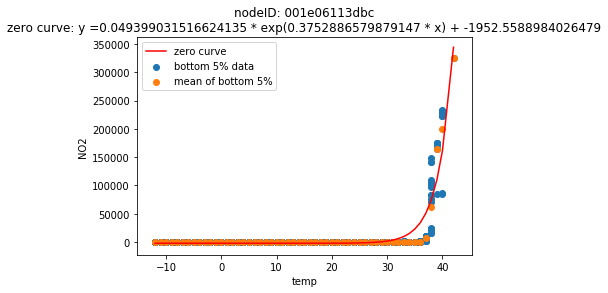

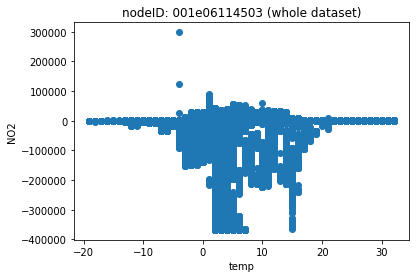

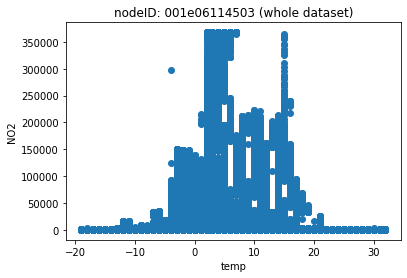

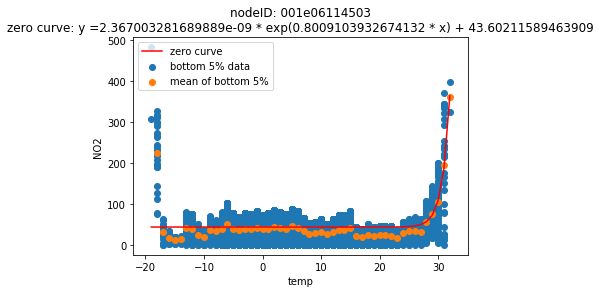

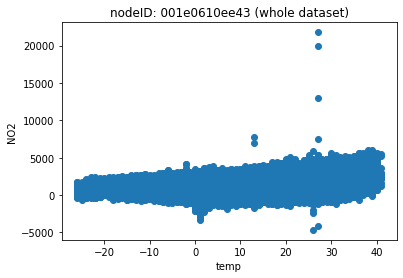

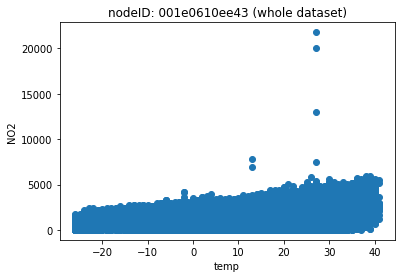

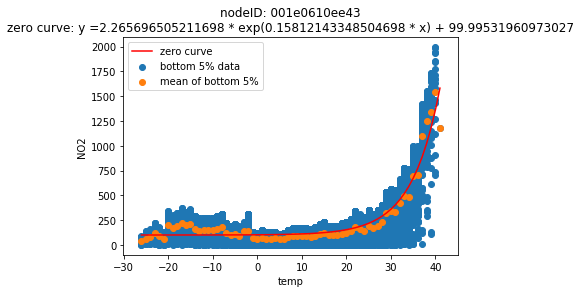

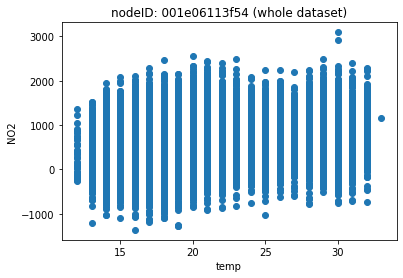

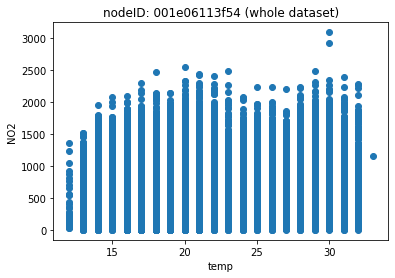

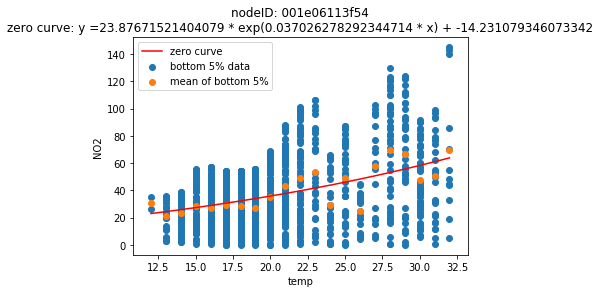

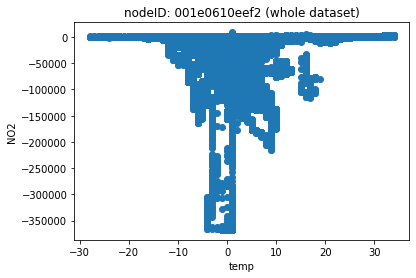

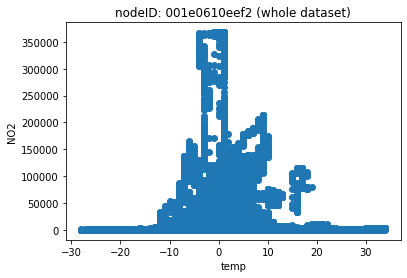

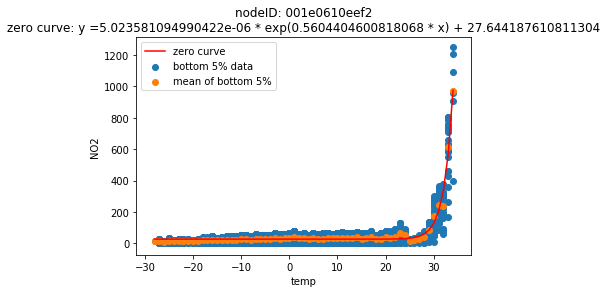

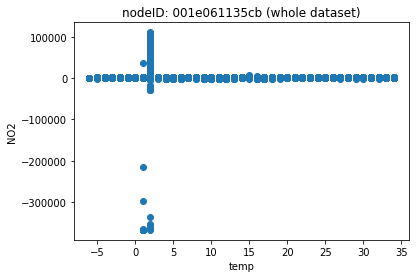

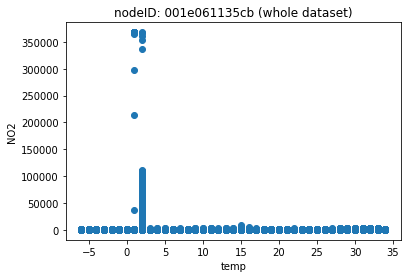

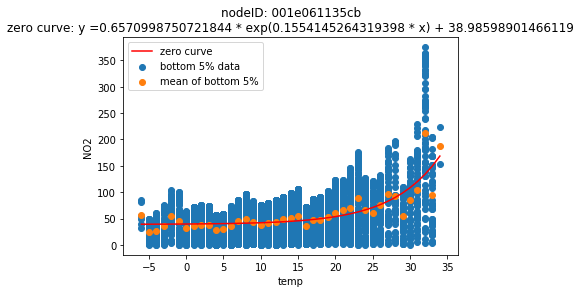

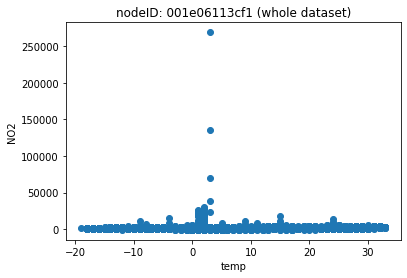

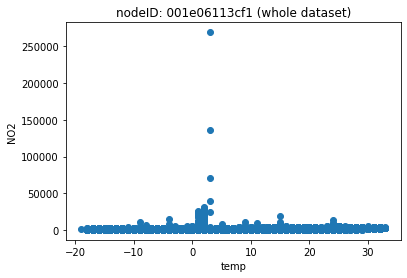

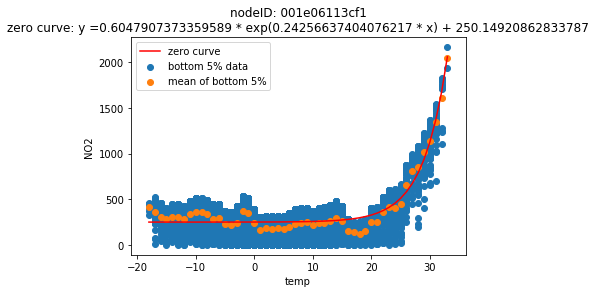

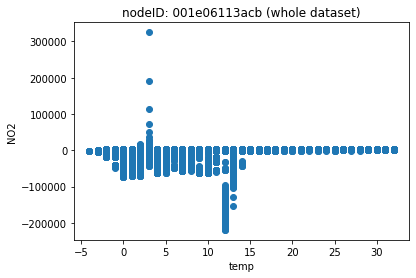

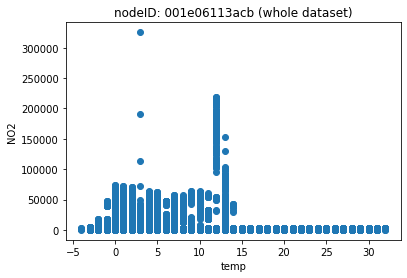

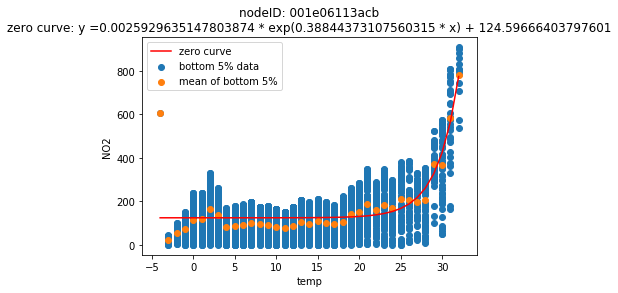

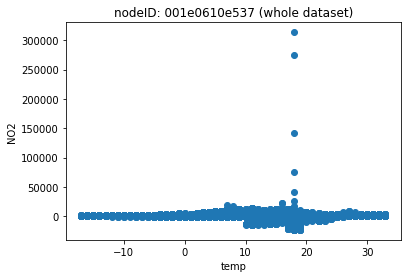

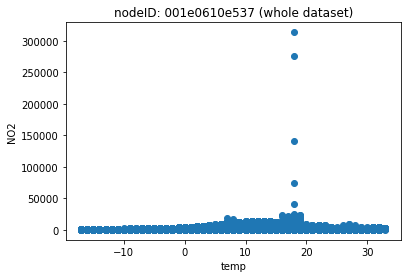

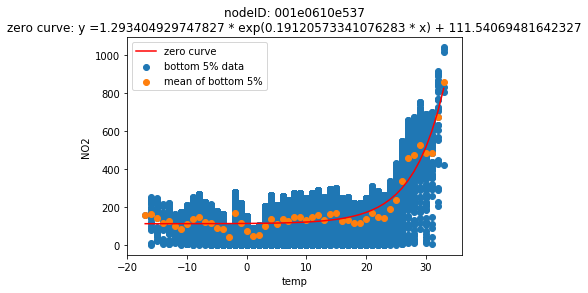

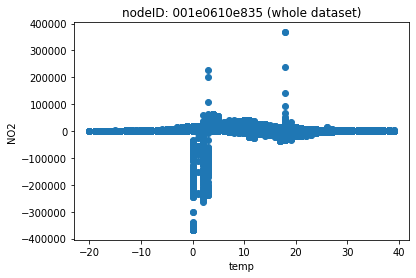

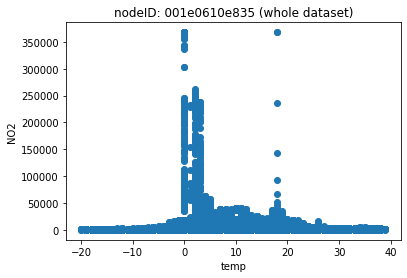

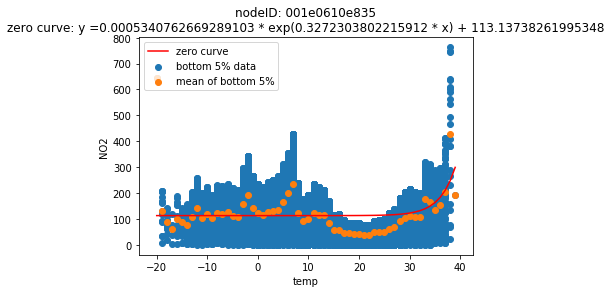

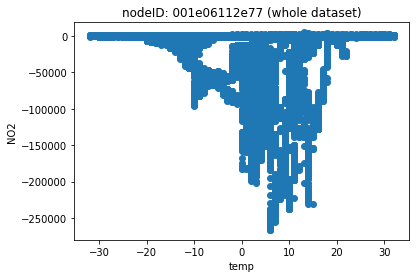

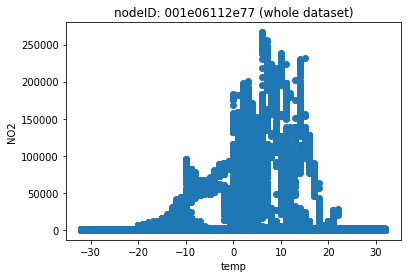

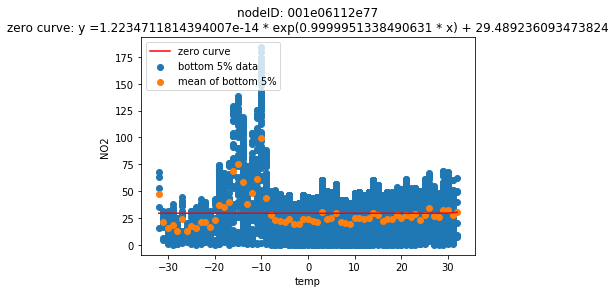

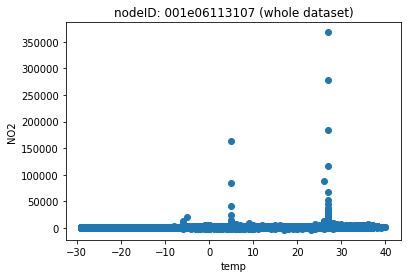

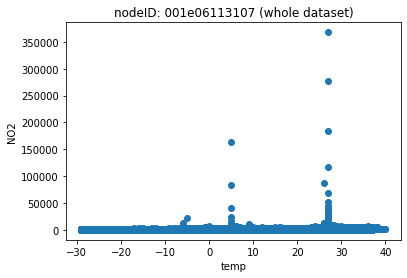

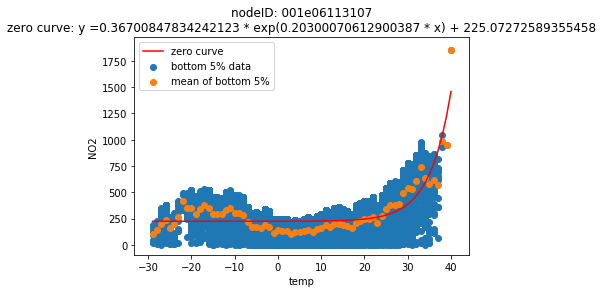

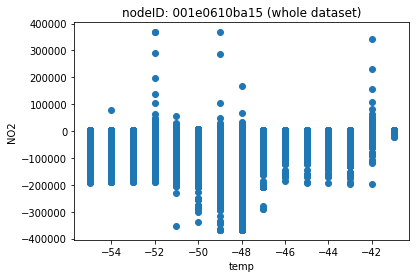

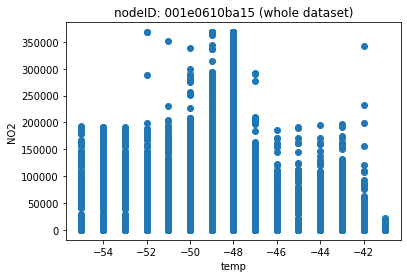

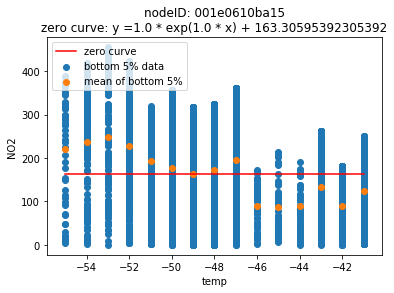

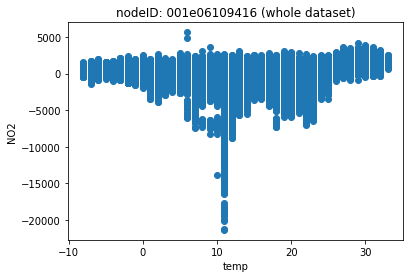

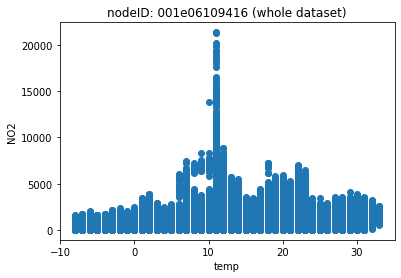

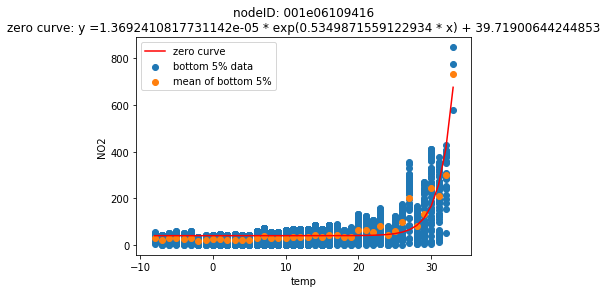

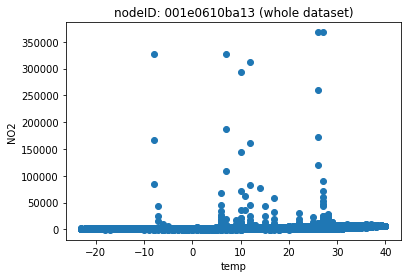

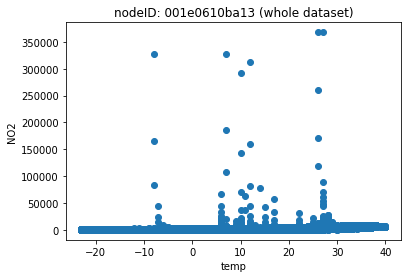

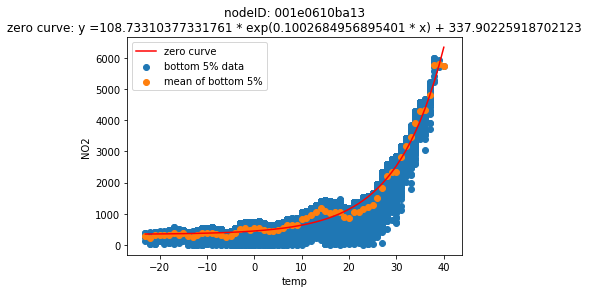

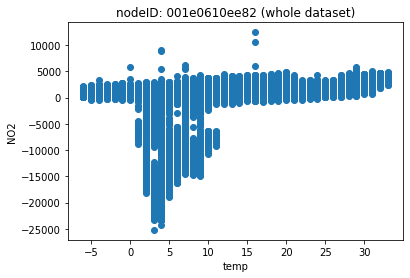

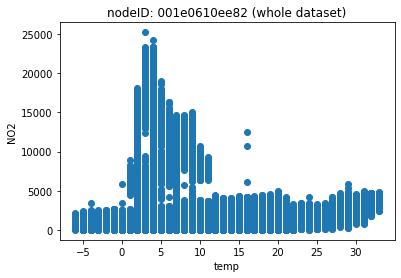

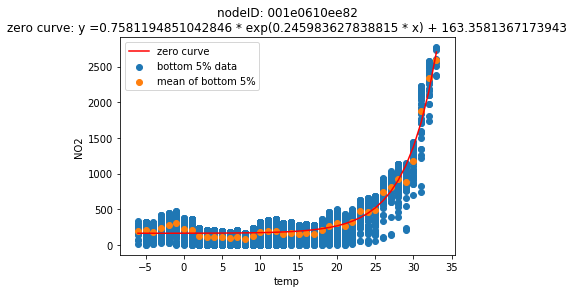

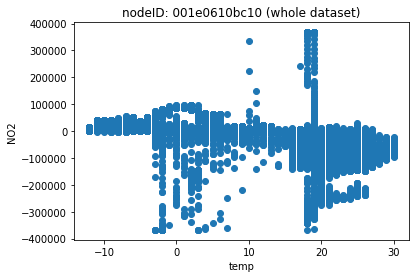

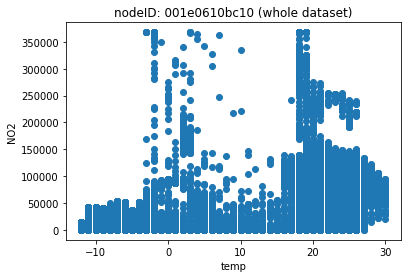

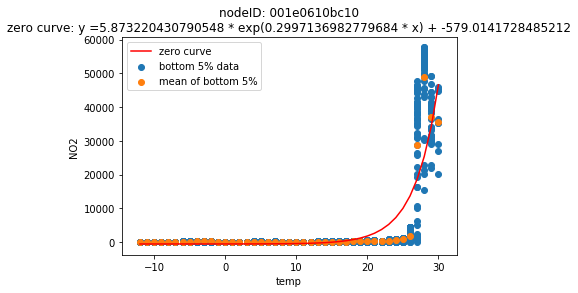

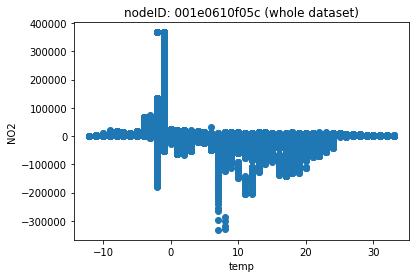

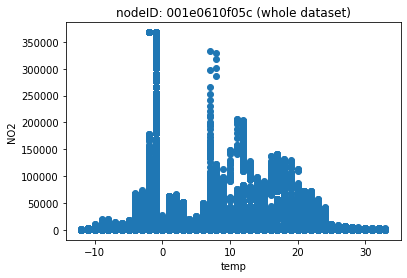

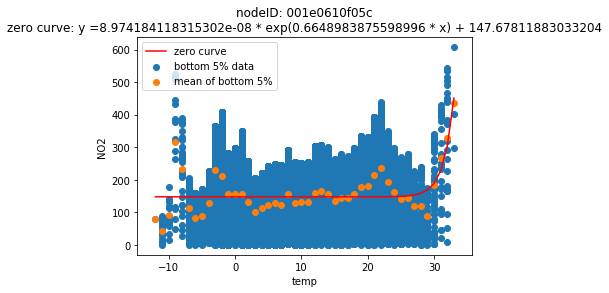

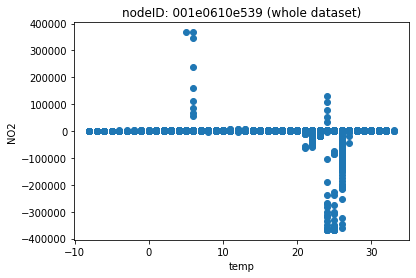

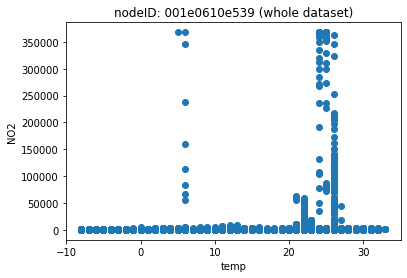

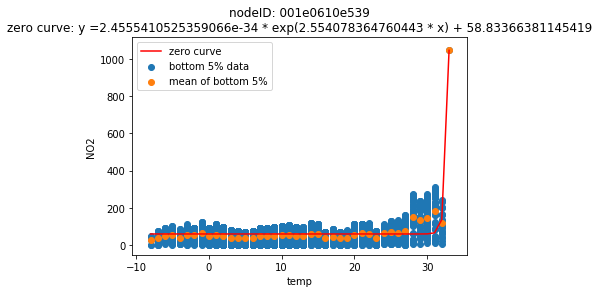

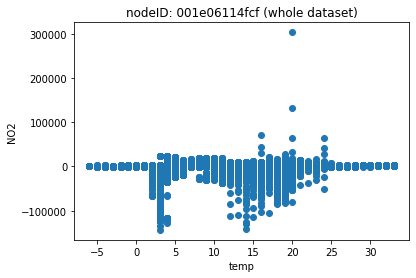

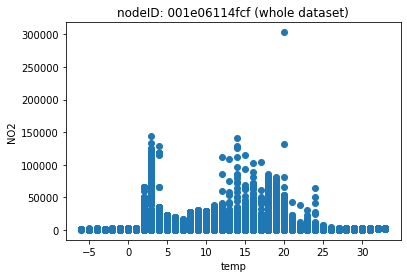

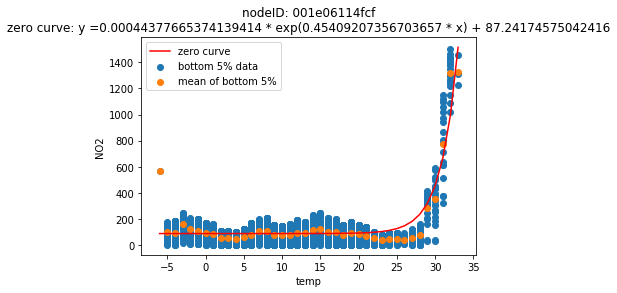

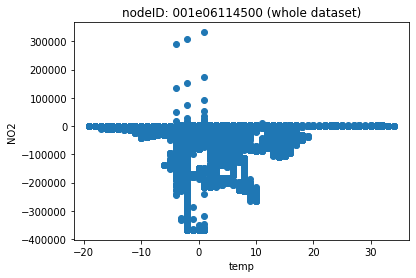

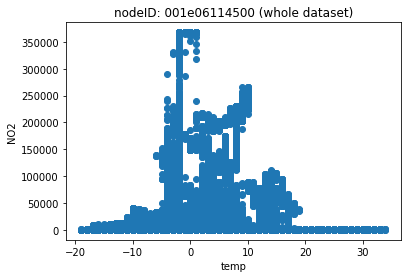

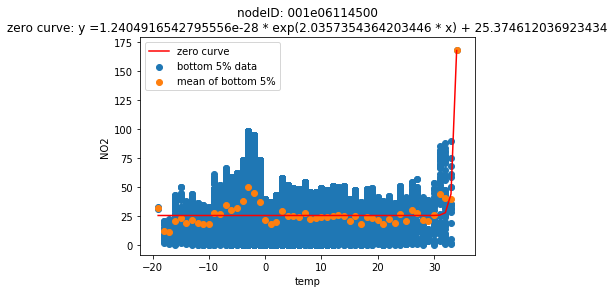

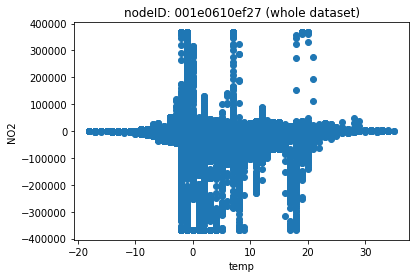

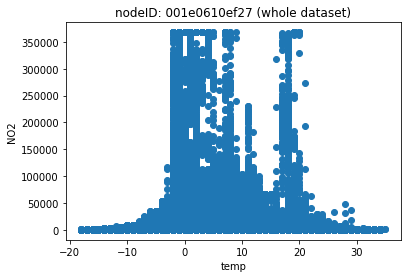

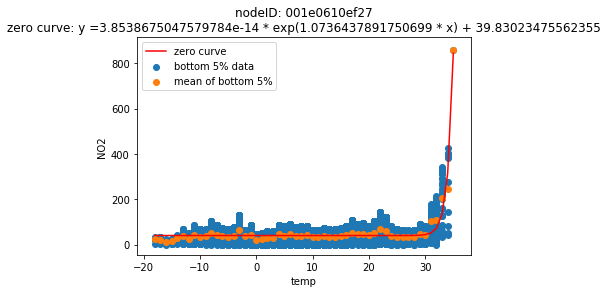

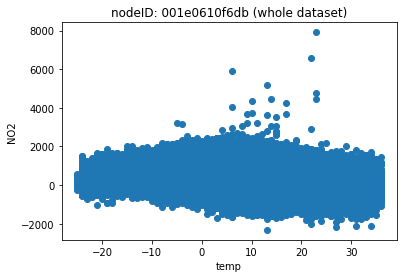

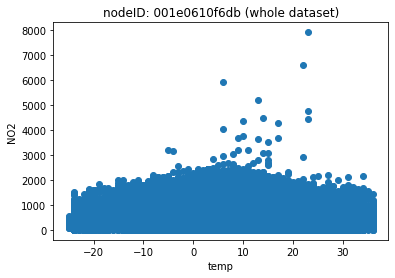

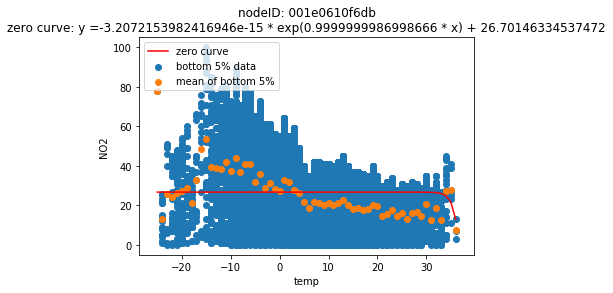

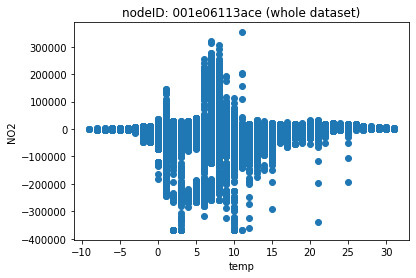

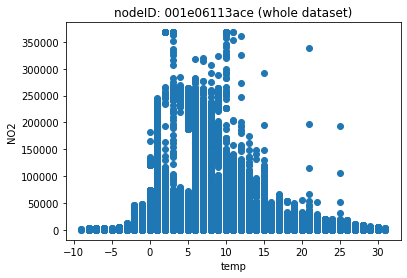

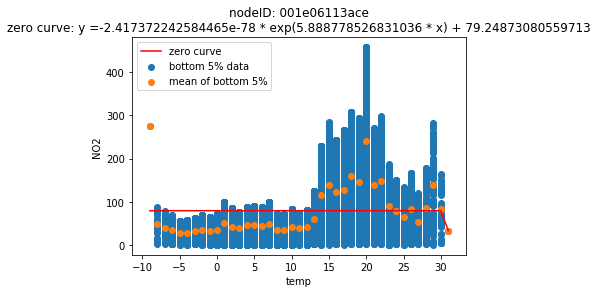

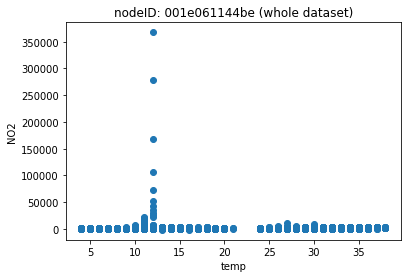

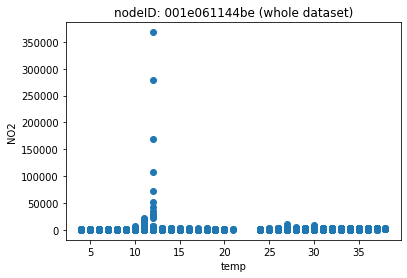

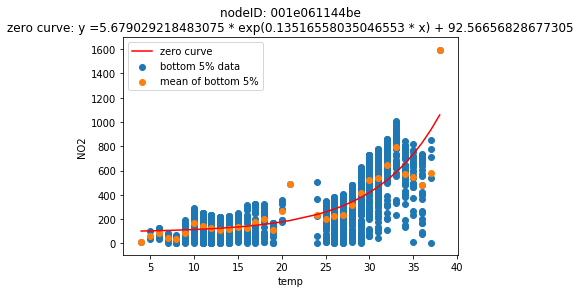

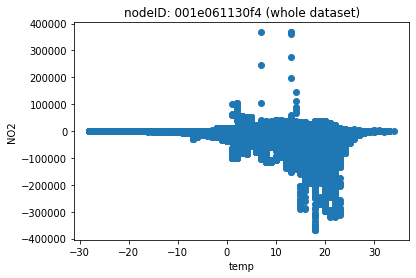

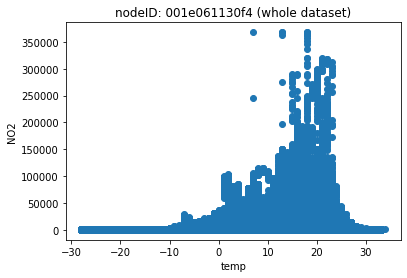

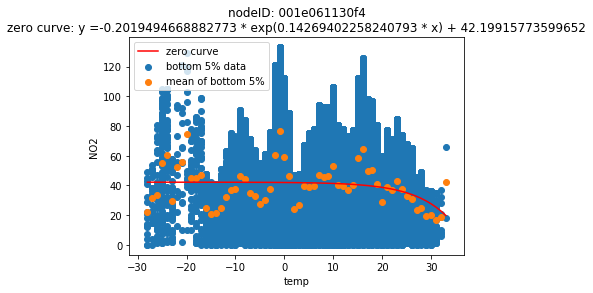

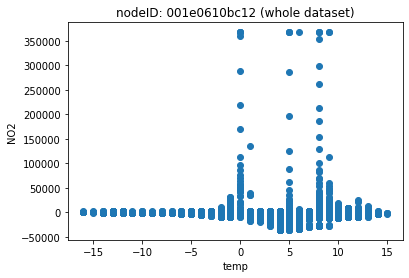

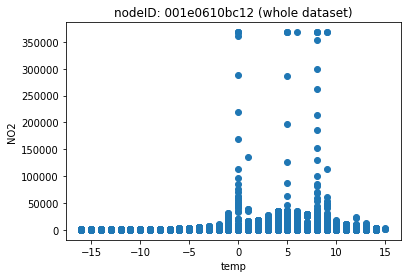

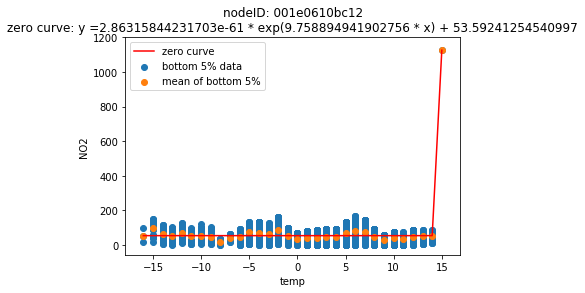

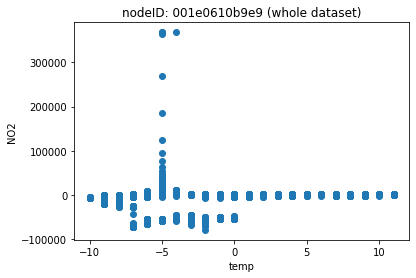

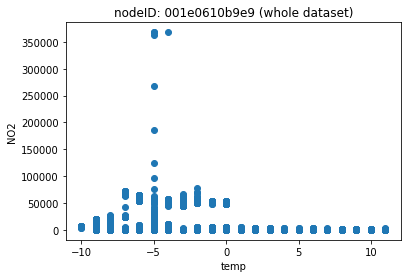

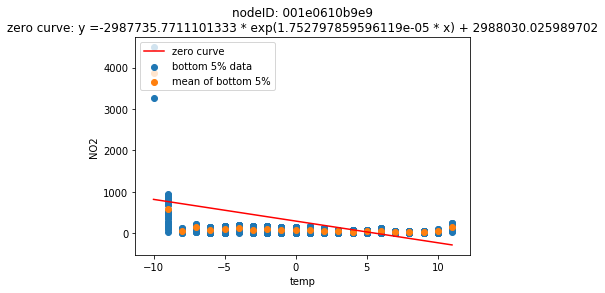

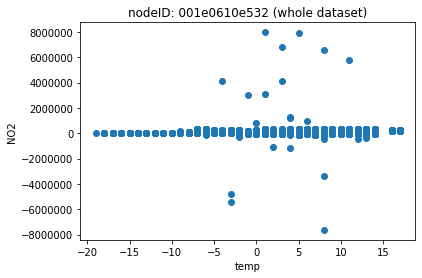

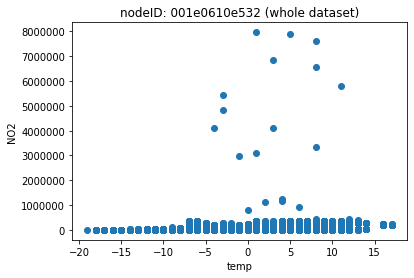

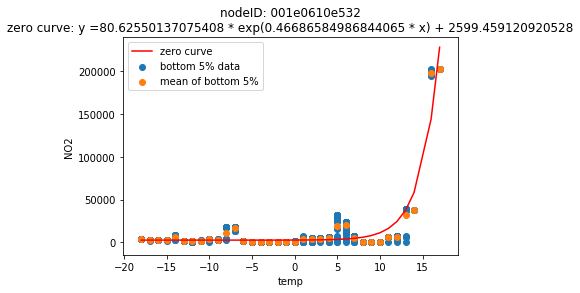

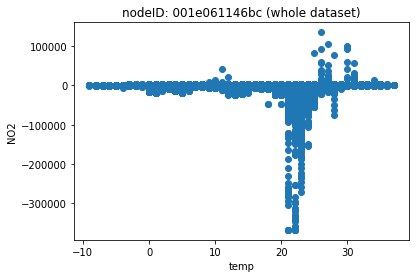

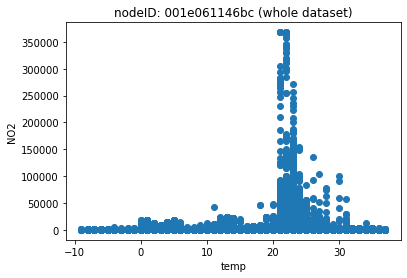

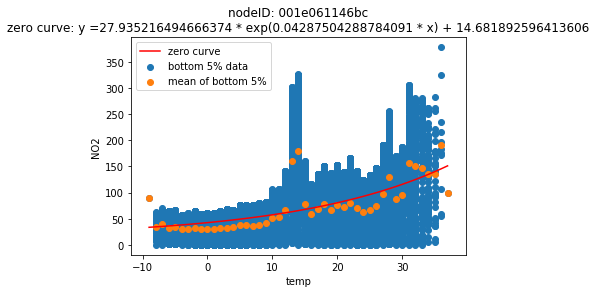

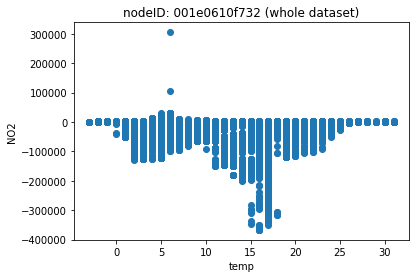

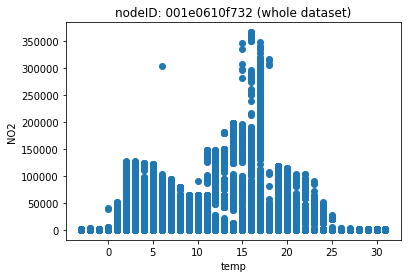

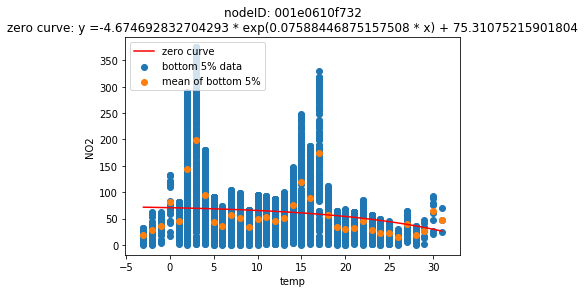

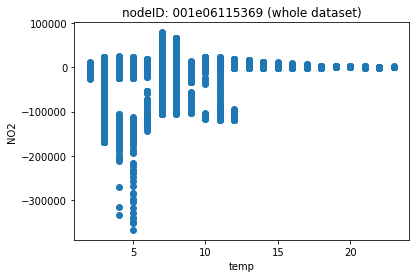

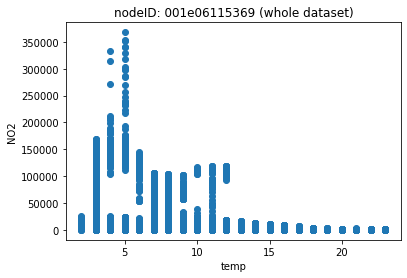

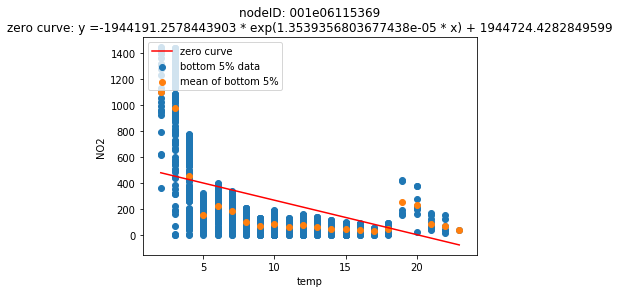

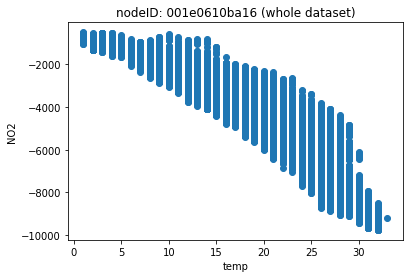

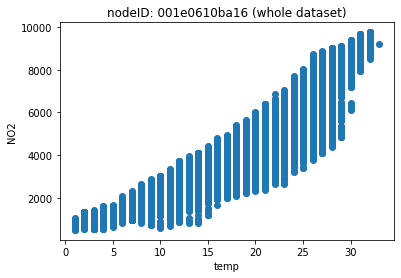

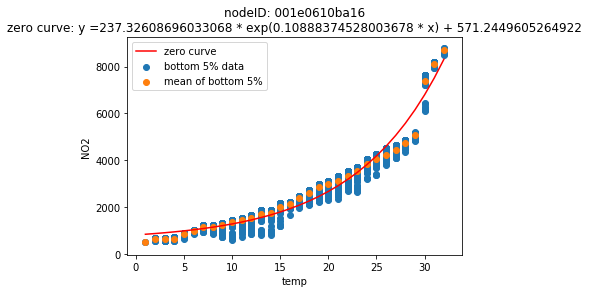

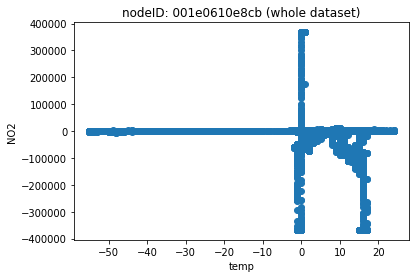

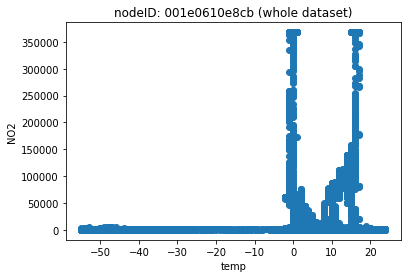

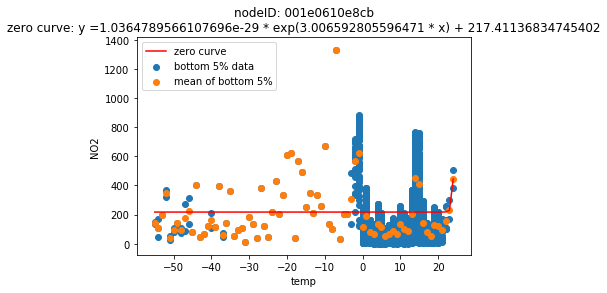

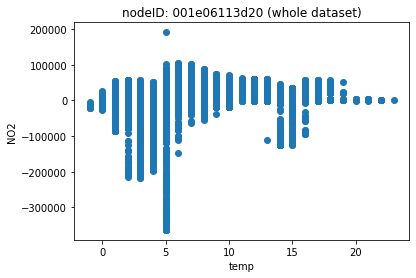

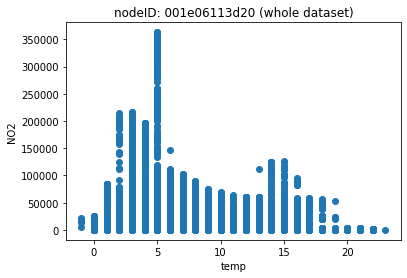

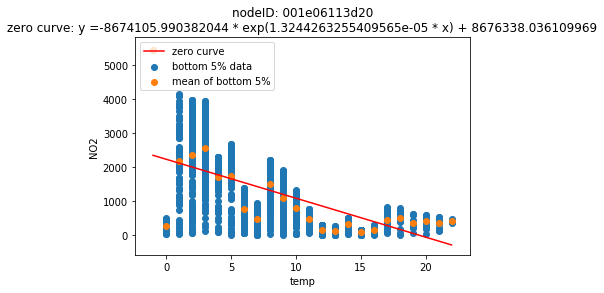

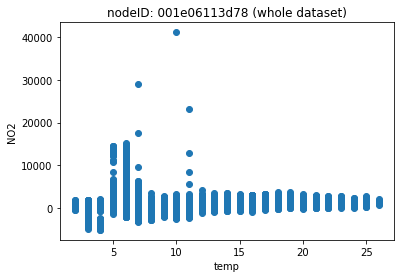

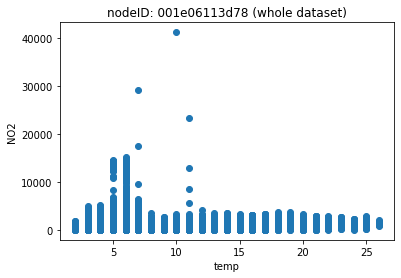

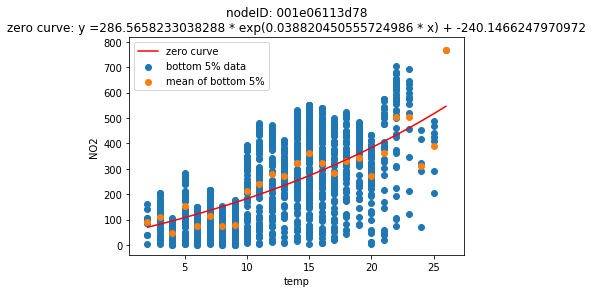

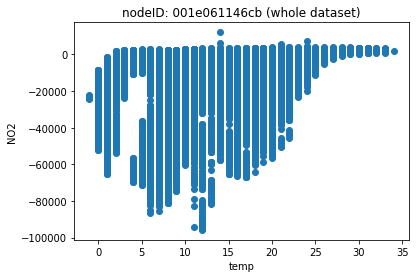

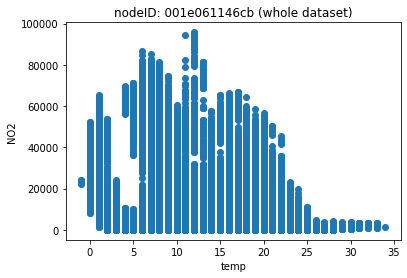

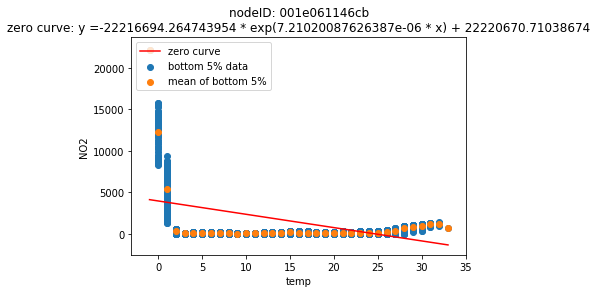

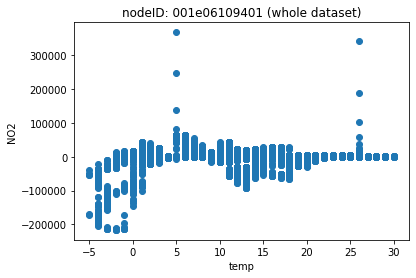

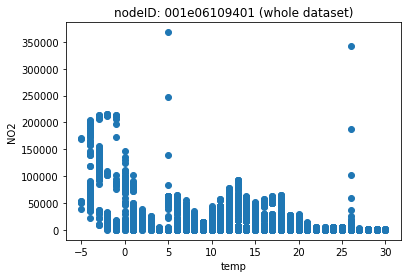

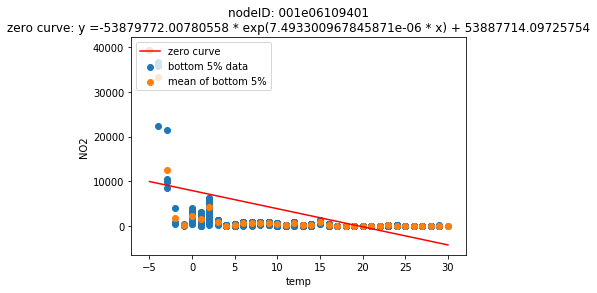

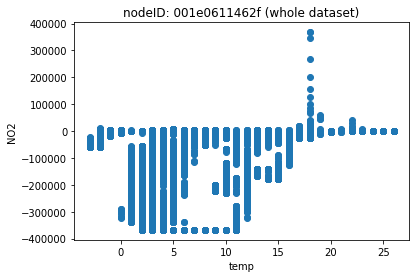

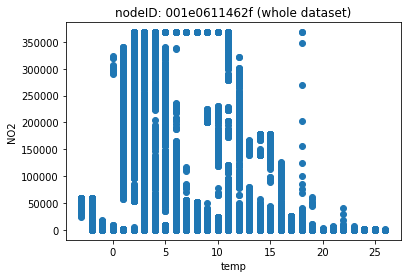

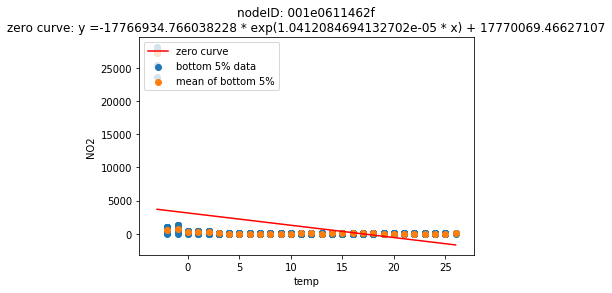

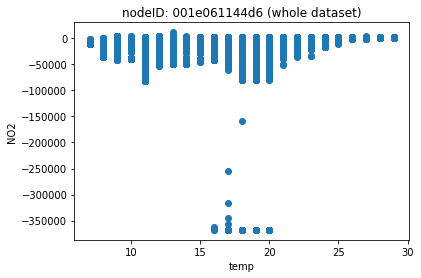

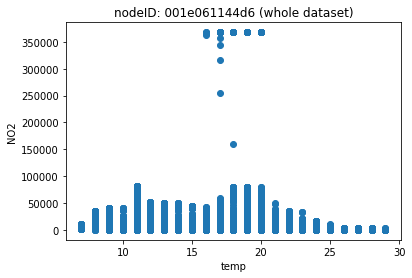

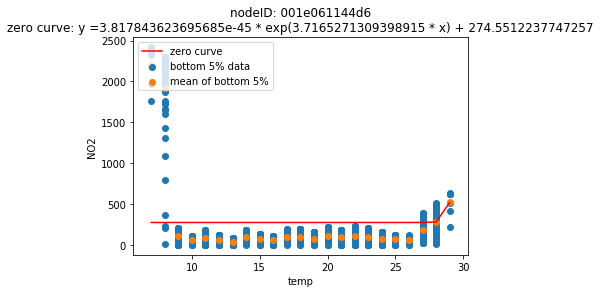

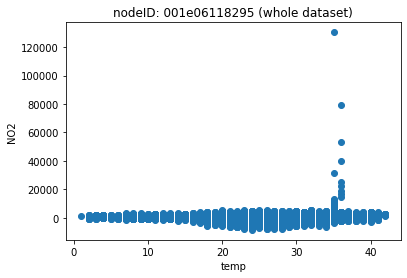

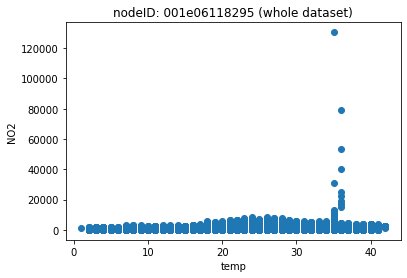

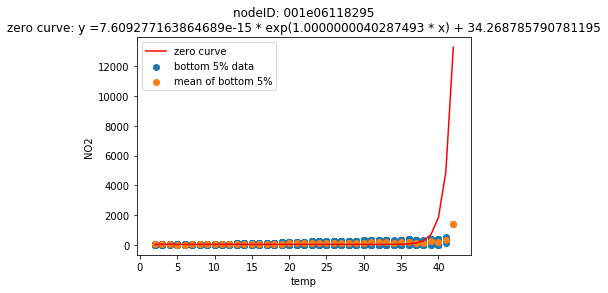

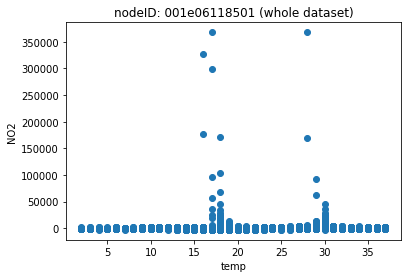

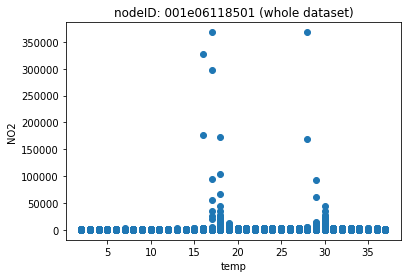

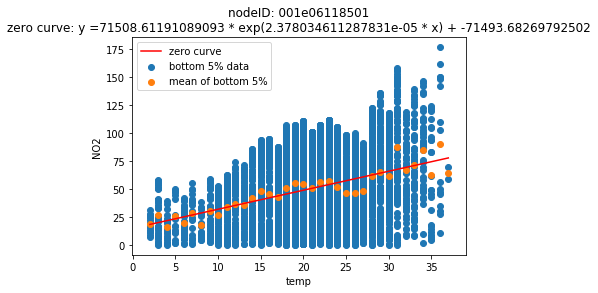

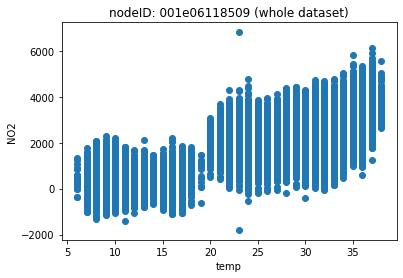

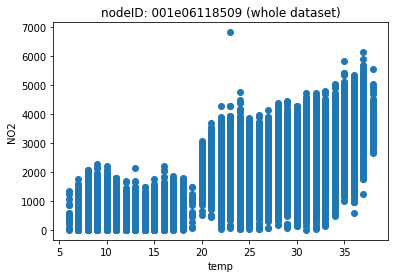

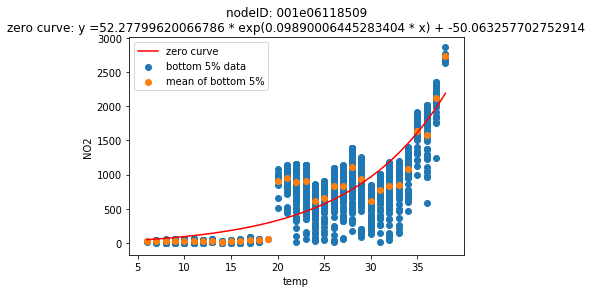

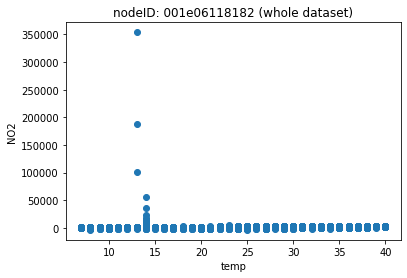

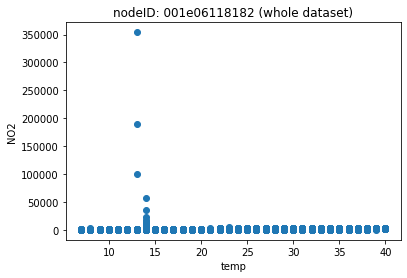

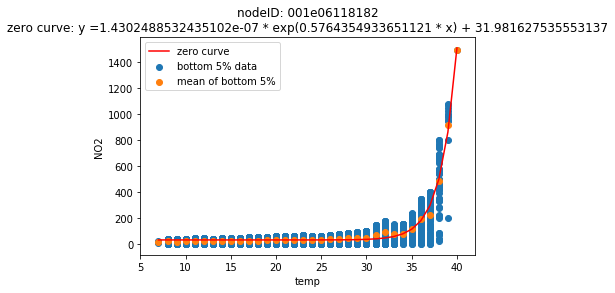

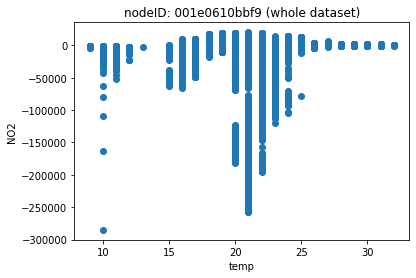

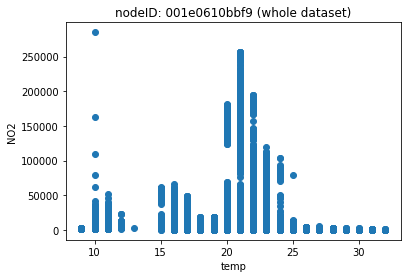

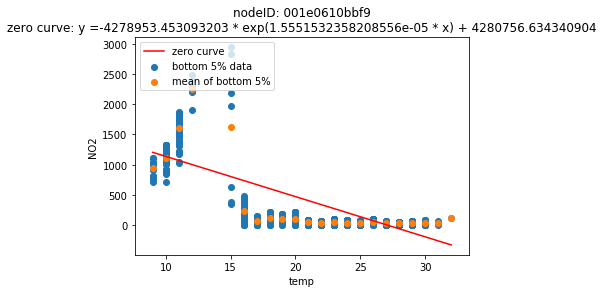

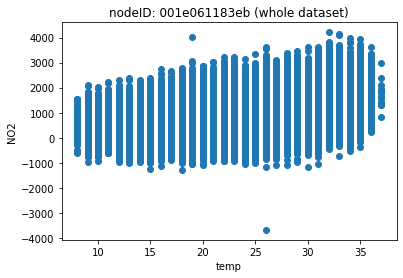

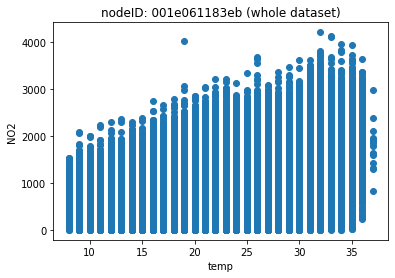

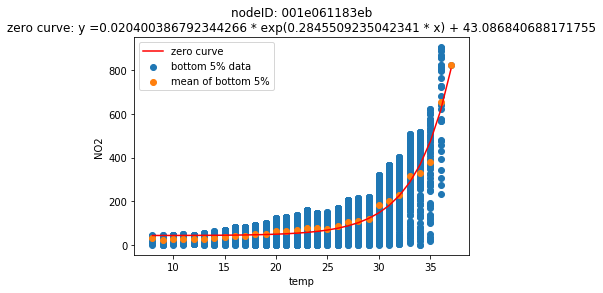

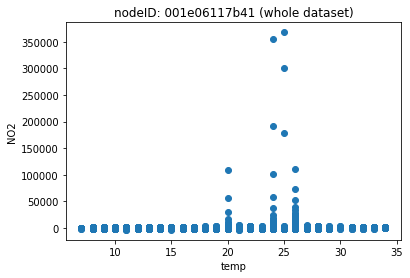

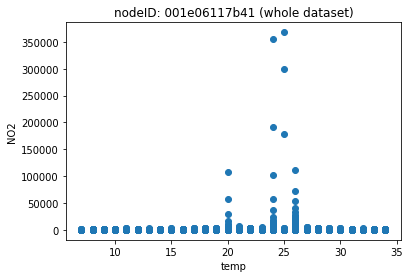

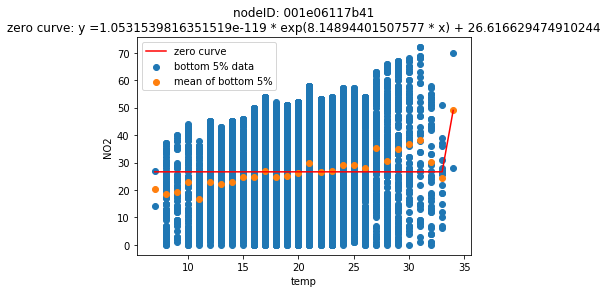

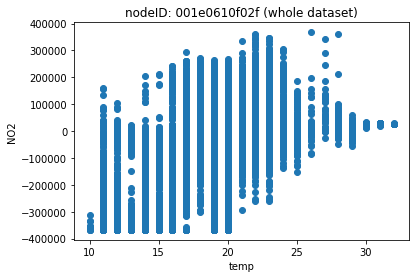

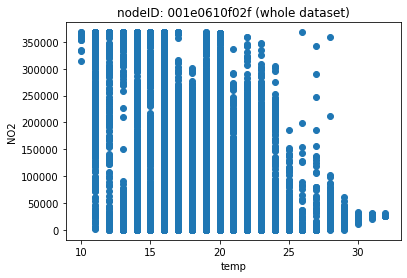

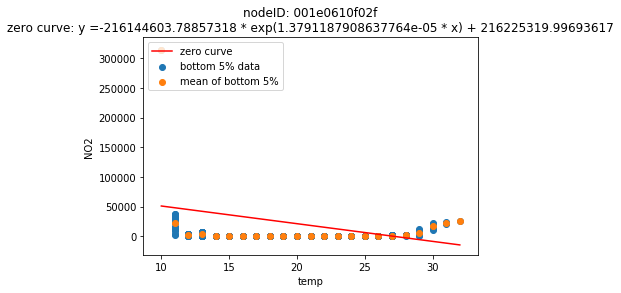

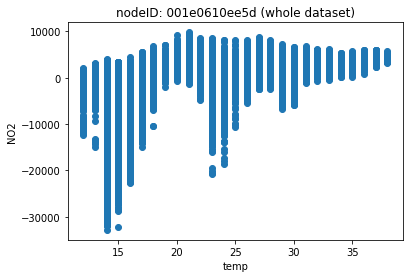

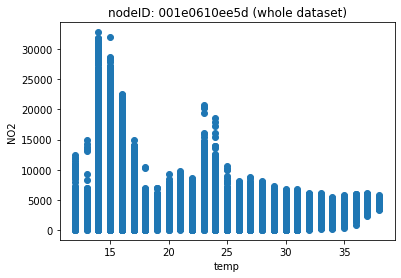

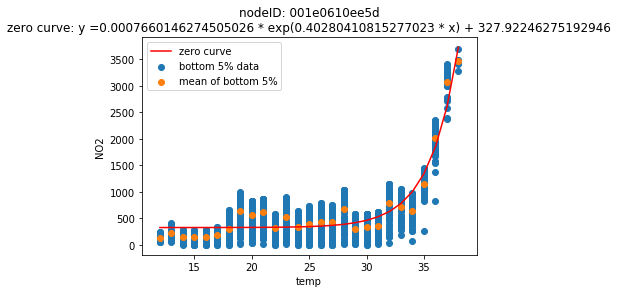

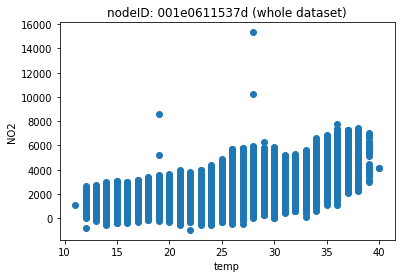

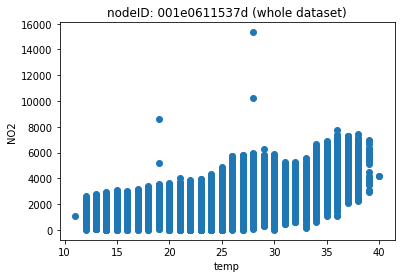

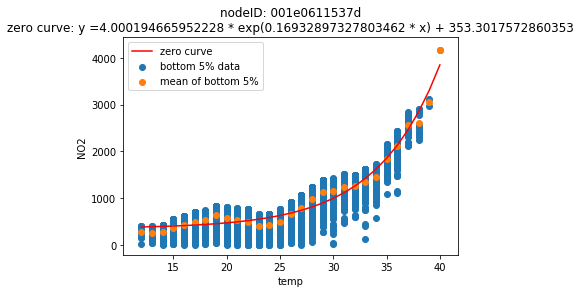

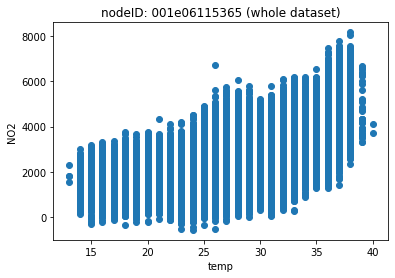

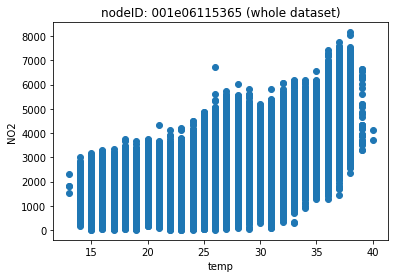

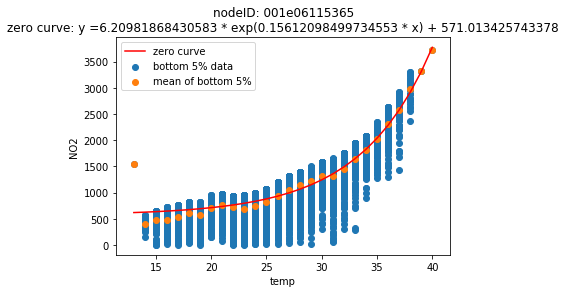

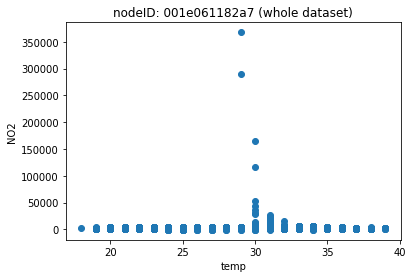

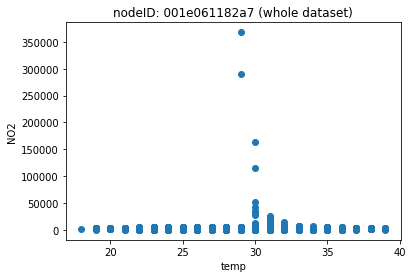

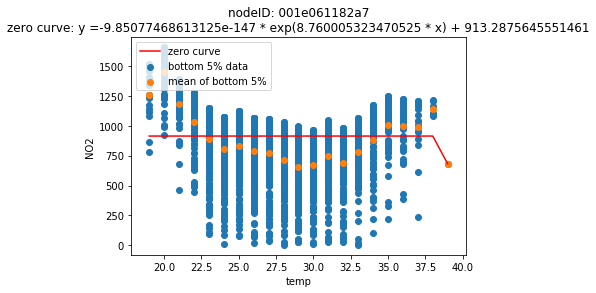

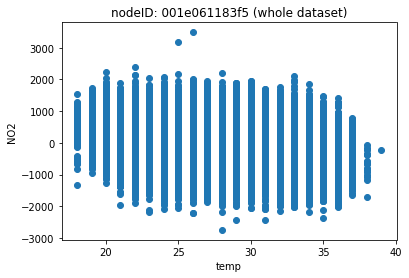

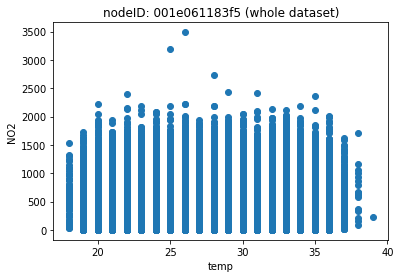

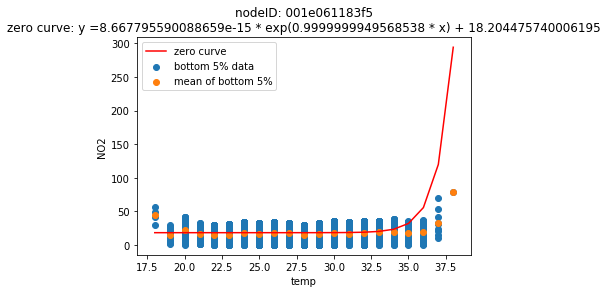

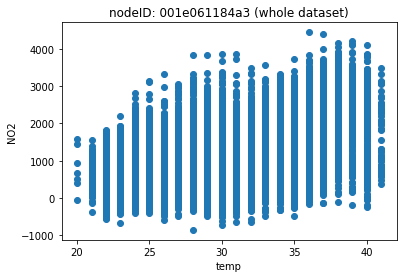

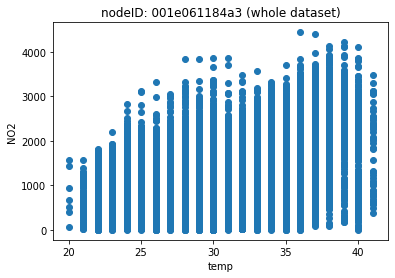

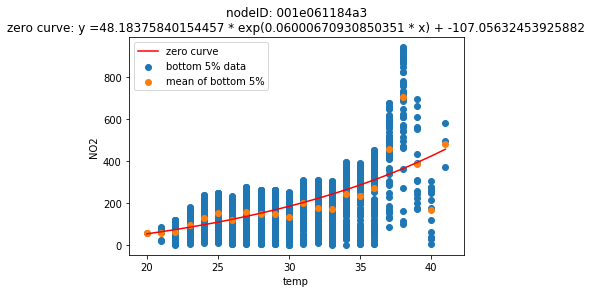

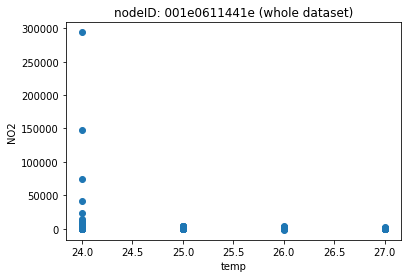

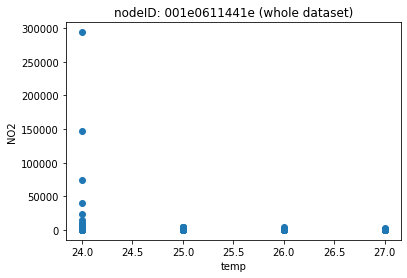

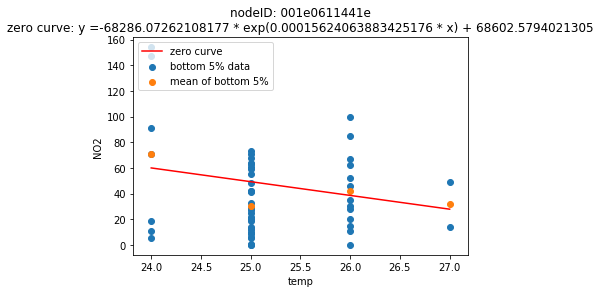

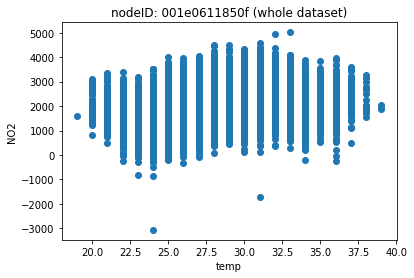

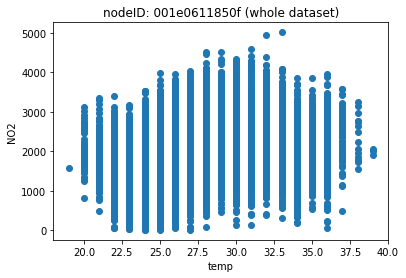

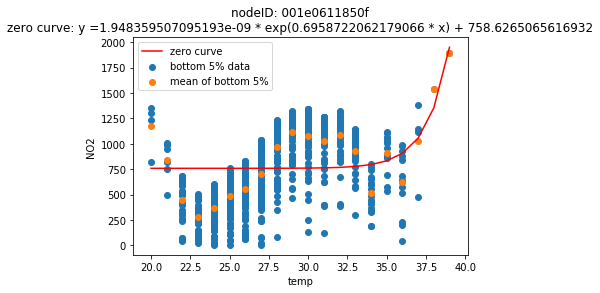

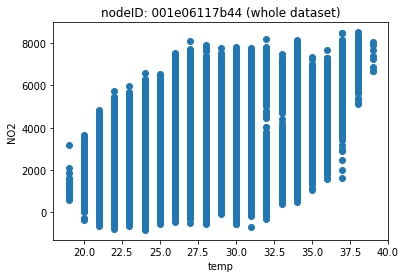

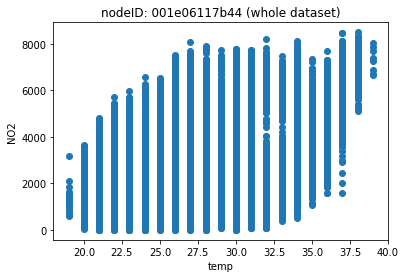

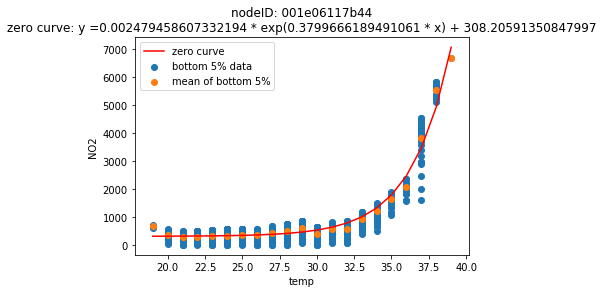

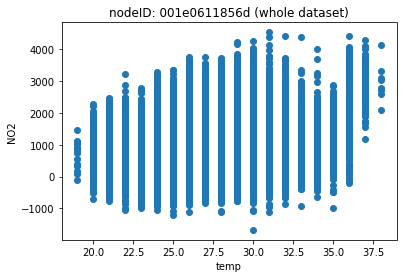

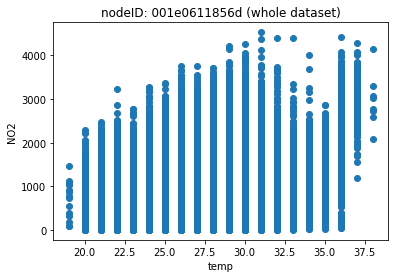

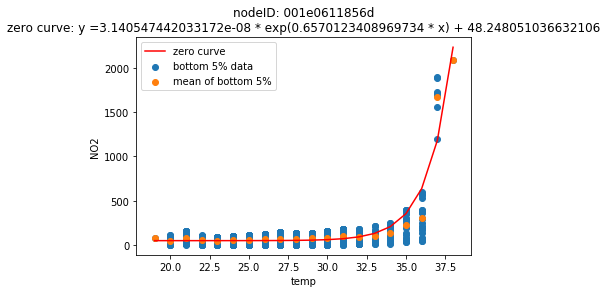

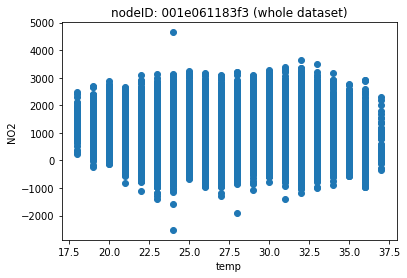

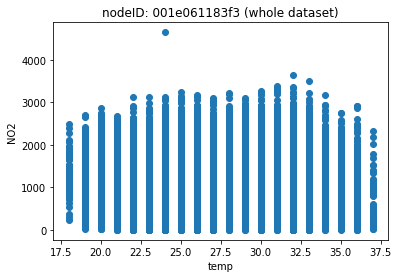

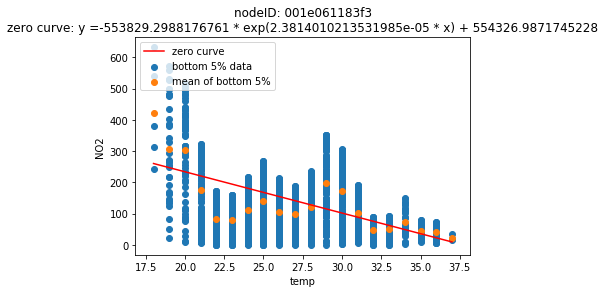

In [17]:
with open('curve_coefficients.csv', "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['y=a*exp(b*x)+c'])
    writer.writerow(['NodeID', 'a', 'b', 'c'])
    
    for i in range(no2_temp['node_id'].nunique()):

        node = pd.read_csv('nodedata/'+nodes[i]+'.csv',header = 0, index_col=0)
        node['temp'] = round(node['temp'])
        node = node[~node['temp'].isna()]
        node = node.sort_values(by=['temp'])
        plt.figure()
        plt.scatter(node['temp'], node['no2_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('NO2')
        plt.savefig('node_pic_abs/'+nodes[i]+'_1.png')
    
        node['abs_no2_raw'] = abs(node['no2_raw'])
        plt.figure()
        plt.scatter(node['temp'], node['abs_no2_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('NO2')
        plt.savefig('node_pic_abs/'+nodes[i]+'_2.png')
       
        node_bottom = node[(node['abs_no2_raw'] < node.groupby('temp')['abs_no2_raw'].transform(lambda x: x.quantile(0.05)))]
        node_bottom_mean = node_bottom.groupby('temp').mean().reset_index()
    
        xdata = np.array(node_bottom_mean['temp'])
        ydata = np.array(node_bottom_mean['abs_no2_raw'])
        popt, pcov = curve_fit(func, xdata, ydata, maxfev = 50000)
        
        writer.writerow([nodes[i], str(popt[0]), str(popt[1]), str(popt[2])])
        
        plt.figure()
        plt.scatter(node_bottom['temp'], node_bottom['abs_no2_raw'], label='bottom 5% data') #show scatter plot of original data
        plt.scatter(node_bottom_mean['temp'], node_bottom_mean['abs_no2_raw'],label='mean of bottom 5%') 
        plt.plot(xdata,func(xdata, *popt),'r-', label='zero curve')
        plt.xlabel('temp')
        plt.ylabel('NO2')
        plt.title('nodeID: '+nodes[i] +'\n'+
         'zero curve: y =' + str(popt[0]) + ' * exp('+ str(popt[1]) + ' * x)' + ' + ' + str(popt[2]))
        plt.legend(loc=2)
        plt.savefig('node_pic_abs/'+nodes[i]+'_3.png')
        print(i)
        